Перші 5 рядків:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

Статистичний опис даних:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154

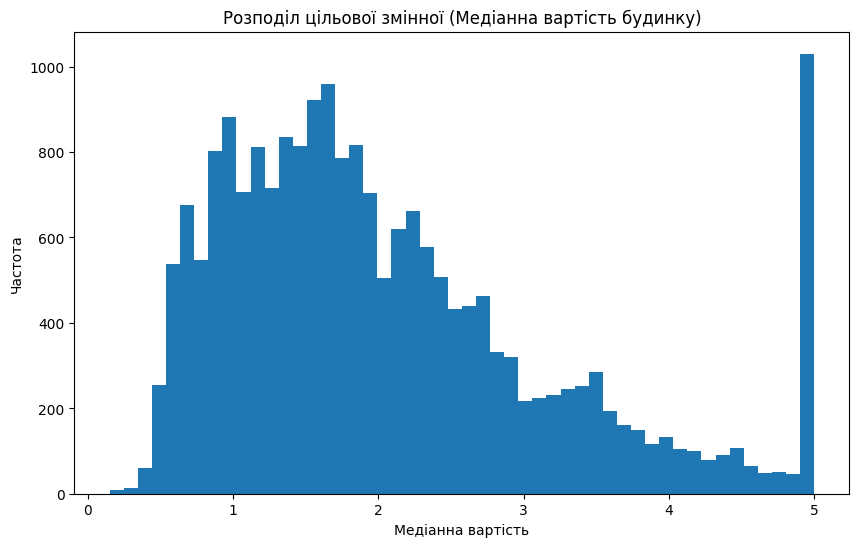

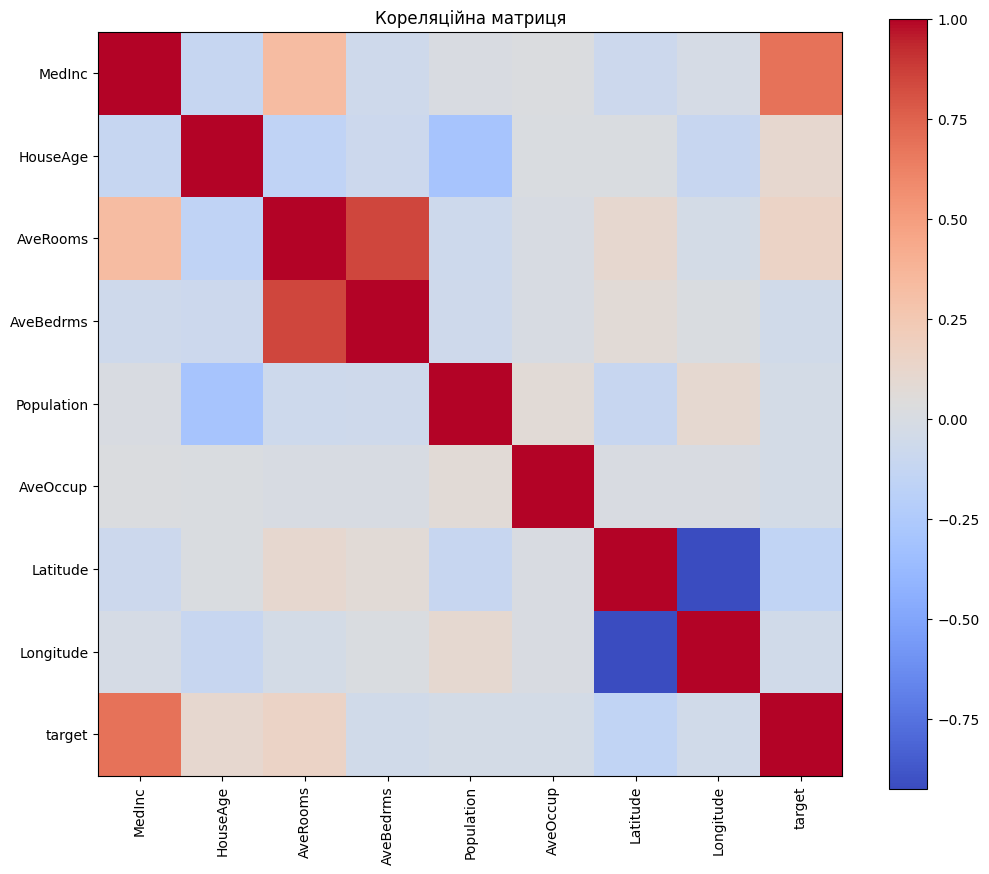

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Завантаження даних
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

# 1. Попередній аналіз даних
print("Перші 5 рядків:")
print(df.head())

print("\nСтатистичний опис даних:")
print(df.describe())

print("\nІнформація про датасет:")
print(df.info())

print("\nПеревірка на пропущені значення:")
print(df.isnull().sum())

# Візуалізація розподілу цільової змінної
plt.figure(figsize=(10, 6))
plt.hist(df['target'], bins=50)
plt.title('Розподіл цільової змінної (Медіанна вартість будинку)')
plt.xlabel('Медіанна вартість')
plt.ylabel('Частота')
plt.show()

# Кореляційна матриця
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Кореляційна матриця')
plt.show()


In [2]:

# 2. Масштабування ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))
y = df['target']



In [3]:
# 3. Поділ на тренувальні і тестові дані
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [6]:
# 4. Побудова моделей та підбір параметрів
from sklearn.metrics import root_mean_squared_error


models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Ridge': Ridge()
}

param_grids = {
    'Linear Regression': {},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Ridge': {'alpha': [0.1, 1.0, 10.0]}
}

results = {}

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = root_mean_squared_error(y_test, y_pred)
    
    results[name] = {'model': best_model, 'r2': r2, 'mse': mse, 'y_pred': y_pred}
    
    print(f"\n{name}:")
    print(f"Найкращі параметри: {grid_search.best_params_}")
    print(f"R2 score: {r2:.4f}")
    print(f"MSE: {mse:.4f}")



Linear Regression:
Найкращі параметри: {}
R2 score: 0.5758
MSE: 0.7456


KeyboardInterrupt: 

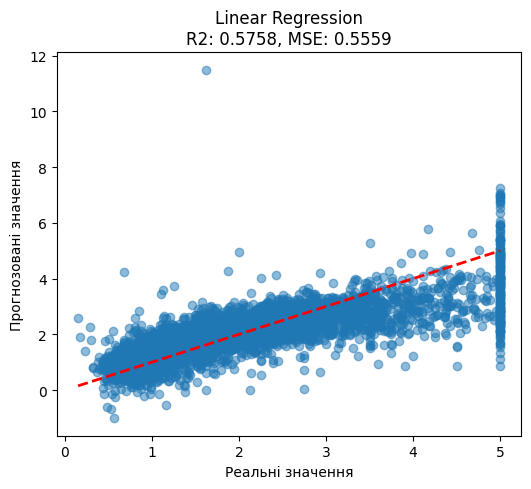

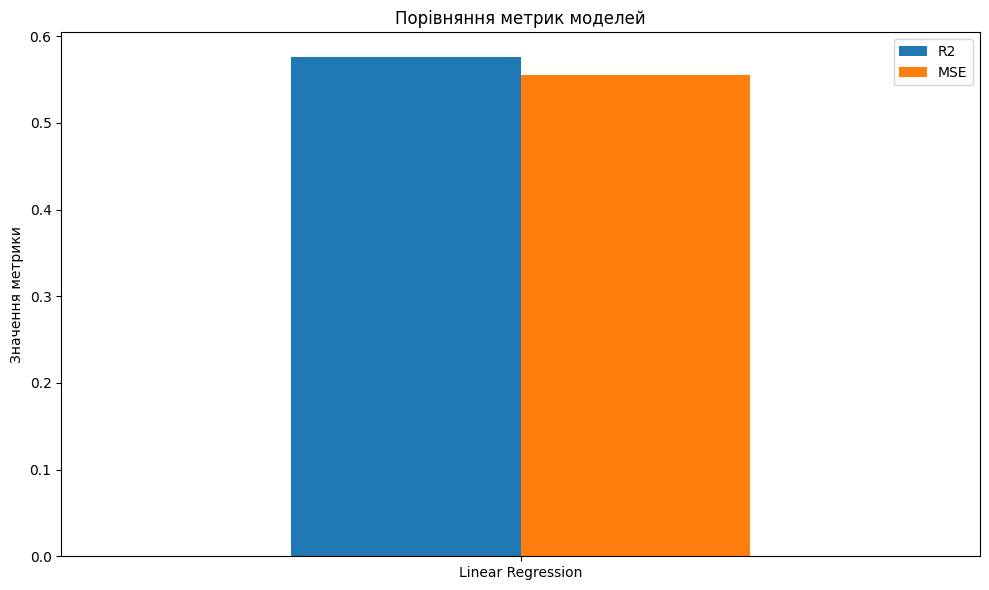

In [5]:

# 5. Візуалізація результатів
plt.figure(figsize=(15, 5))

for i, (name, result) in enumerate(results.items()):
    plt.subplot(1, 3, i+1)
    plt.scatter(y_test, result['y_pred'], alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Реальні значення')
    plt.ylabel('Прогнозовані значення')
    plt.title(f'{name}\nR2: {result["r2"]:.4f}, MSE: {result["mse"]:.4f}')

plt.tight_layout()
plt.show()

# Порівняння метрик
metrics = pd.DataFrame({
    'R2': [result['r2'] for result in results.values()],
    'MSE': [result['mse'] for result in results.values()]
}, index=results.keys())

metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Порівняння метрик моделей')
plt.ylabel('Значення метрики')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

На основі отриманих результатів можна зробити наступні висновки:

Якість моделей: Судячи з метрик R2 та MSE, модель випадкового лісу (Random Forest) показала найкращі результати, за нею слідує Ridge регресія, а лінійна регресія показала найгірші результати. Це свідчить про те, що зв'язки між ознаками та цільовою змінною є нелінійними.
Важливість ознак: Random Forest дозволяє оцінити важливість ознак. Можна проаналізувати, які фактори найбільше впливають на ціни на житло в Каліфорнії.
Регуляризація: Ridge регресія працює краще за звичайну лінійну регресію що може вказувати на те, що деякі ознаки можуть бути надлишковими.
Складність моделі: Random Forest показав найкращі результати, що може вказувати на складні взаємозв'язки в даних, які краще моделюються ансамблевими методами.
Можна спробувати інші методи, такі як градієнтний бустинг або нейронні мережі, для потенційного покращення результатів.